# Final Project

### Oleh : Muhammad Nur Abdul 'Aziz

Project ini bertujuan untuk mengetahui variabel apa saja yang bisa digunakan untuk dibuat model regresi dan membuat kluster dari data tersebut. Pertanyaan yang harus dijawab adalah:
1. Variabel apa saja yang saling berkorelasi?
2. Bagaimana model regresi dan nilai keakuratannya?
3. Bagaimana kluster untuk data tersebut?

Pada final project ini digunakan data kapasitas terpasang, tenaga listrik yang dibangkitkan, dan listrik yang didistribusikan menurut provinsi di Indonesia tahun 2014-2015 yang diambil dari https://www.bps.go.id/statictable/2015/09/28/1858/kapasitas-terpasang-tenaga-listrik-yang-dibangkitkan-dan-listrik-yang-didistribusikan-menurut-provinsi-2014-2015.html. Data yang digunakan untuk melakukan analisis berikut hanya data tahun 2015. Berikut ditampilkan data kapasitas terpasang, tenaga listrik yang dibangkitkan, dan listrik yang didistribusikan menurut provinsi di Indonesia tahun 2015.

In [2]:
import pandas as pd
data = pd.read_excel('D:\\listrik.xlsx')
data

,Provinsi,Kapasitas Terpasang (MW),Tenaga Listrik yang Dibangkitkan (GWh),Listrik yang Didistribusikan (GWh)
0,Aceh,232.10,618.26,2119.00
1,Sumatera Utara,4241.54,18876.59,8703.67
2,Sumatera Barat,81.15,182.69,3063.28
3,Riau,173.80,969.73,3586.45
4,Jambi,60.37,134.31,1083.49
5,Sumatera Selatan,3146.21,16431.48,4783.02
6,Bengkulu,25.89,82.87,785.43
7,Lampung,121.12,40.55,3571.00
8,Kepulauan Bangka Belitung,314.56,939.41,861.52
9,Kepulauan Riau,736.80,2830.82,2694.79


### 1. Membuat Scatter Plot dari Dataset

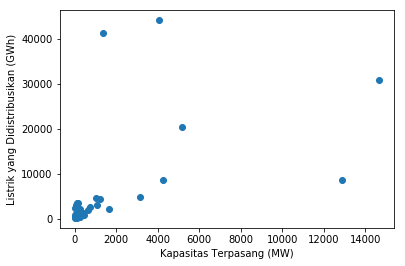

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['Kapasitas Terpasang (MW)'], data['Listrik yang Didistribusikan (GWh)'])
plt.xlabel('Kapasitas Terpasang (MW)')
plt.ylabel('Listrik yang Didistribusikan (GWh)')
plt.show()

Gambar di atas adalah scatter plot dari Kapasitas Terpasang (MW) dan Listrik yang Didistribusikan (GWh).

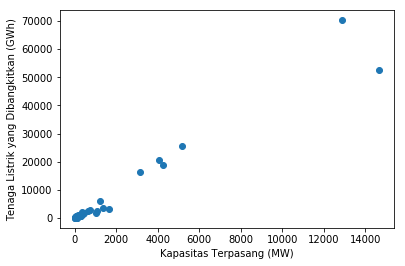

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data['Kapasitas Terpasang (MW)'], data['Tenaga Listrik yang Dibangkitkan (GWh)'])
plt.xlabel('Kapasitas Terpasang (MW)')
plt.ylabel('Tenaga Listrik yang Dibangkitkan (GWh)')
plt.show()

Gambar di atas adalah scatter plot dari Kapasitas Terpasang (MW) dan Tenaga Listrik yang Dibangkitkan (GWh).

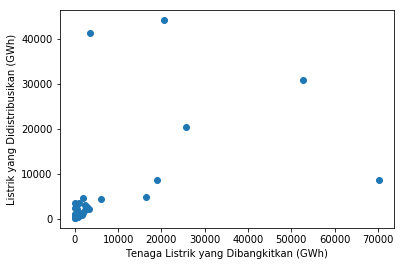

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data['Tenaga Listrik yang Dibangkitkan (GWh)'], data['Listrik yang Didistribusikan (GWh)'])
plt.xlabel('Tenaga Listrik yang Dibangkitkan (GWh)')
plt.ylabel('Listrik yang Didistribusikan (GWh)')
plt.show()

Gambar di atas adalah scatter plot dari Tenaga Listrik yang Dibangkitkan (GWh) dan Listrik yang Didistribusikan (GWh).

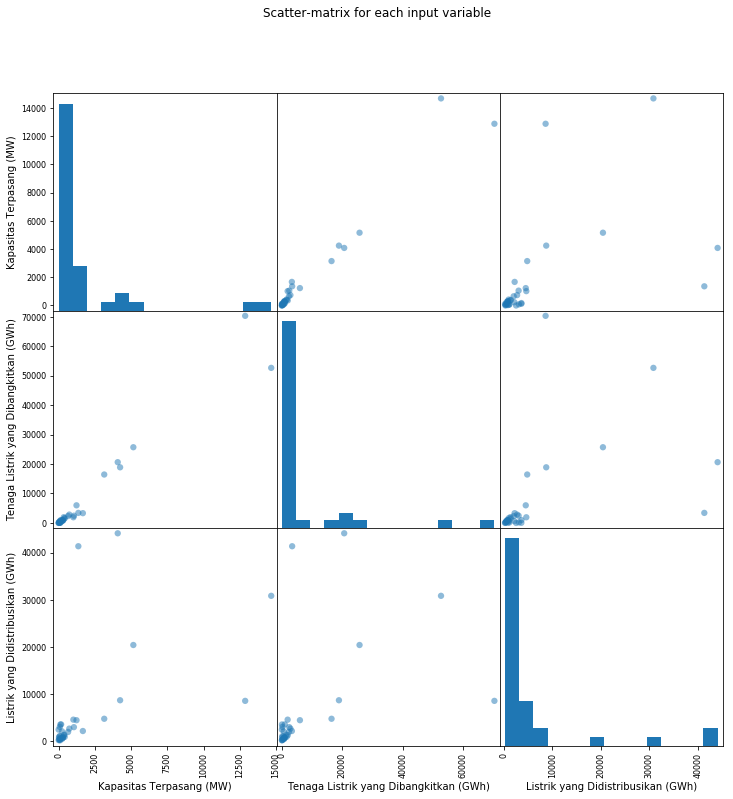

In [12]:
import pandas as pd
from matplotlib import cm
feature_names = ['Kapasitas Terpasang (MW)', 'Tenaga Listrik yang Dibangkitkan (GWh)', 'Listrik yang Didistribusikan (GWh)']
X = data[feature_names]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, marker = 'bo', s=40, hist_kwds={'bins':15}, figsize=(12,12), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('data_scatter_matrix')

Gambar di atas adalah matrix scatter plot dari semua variabel.

### 2. Memilih 2 Variabel yang Diduga Memiliki Korelasi

Berdasarkan hasil pada no. 1, dapat diduga 2 variabel yang memiliki korelasi adalah Kapasitas Terpasang (MW) dan Tenaga Listrik yang Dibangkitkan (GWh). Dilihat dari Scatter Plot-nya membentuk pola menyerupai garis lurus/ linear.

In [15]:
data1 = data[['Kapasitas Terpasang (MW)', 'Tenaga Listrik yang Dibangkitkan (GWh)']]
data1.head()

,Kapasitas Terpasang (MW),Tenaga Listrik yang Dibangkitkan (GWh)
0,232.10,618.26
1,4241.54,18876.59
2,81.15,182.69
3,173.80,969.73
4,60.37,134.31


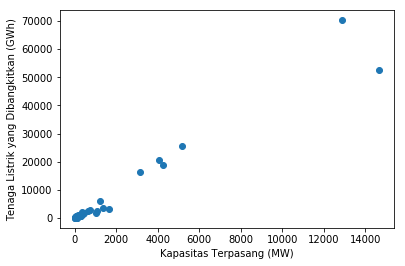

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['Kapasitas Terpasang (MW)'], data['Tenaga Listrik yang Dibangkitkan (GWh)'])
plt.xlabel('Kapasitas Terpasang (MW)')
plt.ylabel('Tenaga Listrik yang Dibangkitkan (GWh)')
plt.show()

### 3. Statistik Deskriptif dari 2 Variabel yang Dipilih

Sebelum melakukan analisis statistik deskriptif, dilihat terlebih dahulu apakah variabel tersebur memiliki outlier atau tidak dengan boxplot.

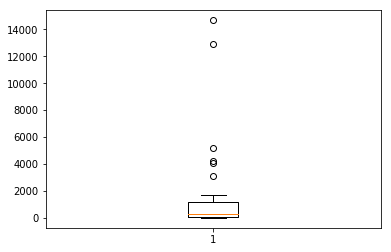

In [16]:
plt.boxplot(data1['Kapasitas Terpasang (MW)'])
plt.show()

Gambar di atas menunjukkan boxplot dari variabel Kapasitas Terpasang (MW) dan dari boxplot tersebut terlihat ada beberapa outlier.

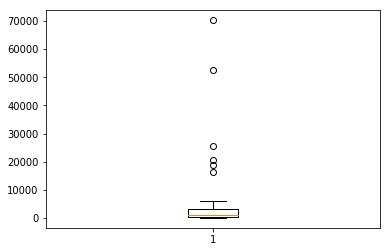

In [17]:
plt.boxplot(data1['Tenaga Listrik yang Dibangkitkan (GWh)'])
plt.show()

Gambar di atas menunjukkan boxplot dari variabel Tenaga Listrik yang Dibangkitkan (GWh) dan dari boxplot tersebut terlihat ada beberapa outlier.

Kemudian dilakukan cleaning data untuk mengurangi nilai outliernya sebagai berikut.

In [19]:
import numpy as np

rata1 = data1['Kapasitas Terpasang (MW)'].mean()
std1 = data1['Kapasitas Terpasang (MW)'].std()
rata2 = data1['Tenaga Listrik yang Dibangkitkan (GWh)'].mean()
std2 = data1['Tenaga Listrik yang Dibangkitkan (GWh)'].std()

dataClean = data1[(np.abs((data1['Kapasitas Terpasang (MW)']-rata1)/std1) <= 1) 
                 & (np.abs((data1['Tenaga Listrik yang Dibangkitkan (GWh)']-rata2)/std2) <= 1)]

In [21]:
dataClean.head()

,Kapasitas Terpasang (MW),Tenaga Listrik yang Dibangkitkan (GWh)
0,232.10,618.26
1,4241.54,18876.59
2,81.15,182.69
3,173.80,969.73
4,60.37,134.31


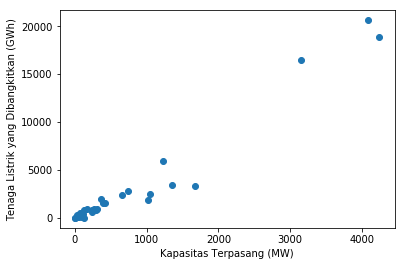

In [22]:
plt.scatter(dataClean['Kapasitas Terpasang (MW)'], dataClean['Tenaga Listrik yang Dibangkitkan (GWh)'])
plt.xlabel('Kapasitas Terpasang (MW)')
plt.ylabel('Tenaga Listrik yang Dibangkitkan (GWh)')
plt.show()

Gambar di atas menunjukkan scatter plot 2 variabel yang dipilih sudah dilakukan cleaning data. Kemudian dilakukan analisis statistik deskriptif dari 2 variabel tersebut sebagai berikut.

In [23]:
dataClean.describe()

,Kapasitas Terpasang (MW),Tenaga Listrik yang Dibangkitkan (GWh)
count,31.000000,31.000000
mean,732.150645,2940.508387
std,1127.120369,5414.194949
min,0.180000,0.000000
25%,90.485000,236.905000
50%,271.140000,917.480000
75%,876.995000,2395.445000
max,4241.540000,20617.920000


Berdasarkan deskripsi data di atas diperoleh jumlah datanya adalah 31 data, rata-rata kapasitas terpasang (MW) 732.150645 MW dan rata-rata tenaga listrik yang dibangkitkan (GWh) 2940.508387 GWh. Standar deviasi kapasitas terpasang (MW) dan tenaga listrik yang dibangkitkan (GWh) masing-masing adalah 1127.120369	 dan 2940.508387. Kapasitas terpasang (MW) minimalnya adalah 0.180000 MW dan kapasitas terpasang (MW) maksimalnya adalah 4241.540000 MW. Tenaga listrik yang dibangkitkan (GWh) minimalnya adalah 0.000000 GWh dan tenaga listrik yang dibangkitkan (GWh) maksimalnya adalah 20617.920000 GWh. Pada data kapasitas terpasang (MW) kuartil pertamanya adalah 90.485000 MW, kuartil kedua (Median) adalah 271.140000 MW, dan kuartil ketiga adalah 876.995000 MW. Pada data tenaga listrik yang dibangkitkan (GWh) kuartil pertamanya adalah 236.905000 GWh, kuartil kedua (Median) adalah 917.480000 GWh, dan kuartil ketiga adalah 2395.445000 GWh.

### 4. Analisis Model Regresi dan Tingkat Keakuratannya

Berdasarkan no. 2, scatter plot mempunyai pola menyerupai garis lurus atau linear sehingga analisis model regresi yang digunakan adalah model regresi linear. Pertama, dilakukan pembagian data yaitu 0.8 bagian untuk perhitungan model regresi dan 0.2 bagian untuk menguji kecocokan model regresi tersebut.

In [25]:
import numpy as np
msk = np.random.rand(len(dataClean))<0.8
train = dataClean[msk]
test = dataClean[~msk]

Kemudian, dari pembagian data tersebut dilakukan analisis model regresi dengan menjadikan kapasitas terpasang (MW) sebagai variabel independen (X) dan tenaga listrik yang dibangkitkan (GWh) sebagai variabel dependen (Y) sebagai berikut.

In [26]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Kapasitas Terpasang (MW)']])
train_y = np.asanyarray(train[['Tenaga Listrik yang Dibangkitkan (GWh)']])
y=regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[4.77909182]]
Intercept:  [-580.72791477]


Berdasarkan analisis model regresi di atas diperoleh model regresinya adalah Y = -580.72791477 + 4.77909182X, yang artinya setiap kenaikan satu satuan kapasitas terpasang (MW) akan menaikkan tenaga listrik yang dibangkitkan (GWh) sebesar 4.77909182. Selanjutnya dilakukan perhitungan keakuratan model regresi untuk mengetahui kecocokan modelnya sebagai berikut.

Mean absolute error: 385.94
Residual sum of squares (MSE): 252364.40
R2-score: 1.00



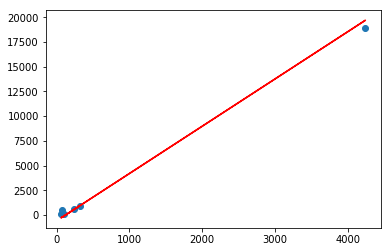

In [42]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Kapasitas Terpasang (MW)']])
test_y = np.asanyarray(test[['Tenaga Listrik yang Dibangkitkan (GWh)']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )
print('')
plt.scatter(test_x, test_y)
plt.plot(test_x, test_y_, c = 'r')
plt.show()

Berdasarkan hasil di atas diperoleh nilai R2-score-nya sebesar 1.00 yang artinya model regresi tersebut cocok untuk digunakan dan plot model regresinya membentuk garis linear di antara data.

### 5. Analisis Clustering Data

Metode yang digunakan untuk analisis clustering data berikut adalah K-Means Cluster.

In [28]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [29]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.42240701, -0.42404755, -0.35484593],
       [ 0.78978174,  0.77945696,  0.24592748],
       [-0.46804428, -0.4527583 , -0.26869152],
       [-0.44003307, -0.40088027, -0.22095843],
       [-0.47432678, -0.45594729, -0.44932399],
       [ 0.45862659,  0.61828664, -0.11178555],
       [-0.48475124, -0.45933797, -0.47651845],
       [-0.45596001, -0.46212751, -0.22236807],
       [-0.39747658, -0.40287883, -0.46957613],
       [-0.26981921, -0.27820584, -0.30231188],
       [-0.08154393, -0.24012126,  3.22256723],
       [ 0.74030786,  0.89423736,  3.47281809],
       [ 1.06603007,  1.22858317,  1.31382677],
       [-0.49252424, -0.46480038, -0.32152939],
       [ 3.94247505,  3.00399312,  2.26422038],
       [ 3.39946561,  4.16767024,  0.23419699],
       [-0.18504786, -0.33825606, -0.12901497],
       [-0.37351966, -0.36210226, -0.42023634],
       [-0.40270998, -0.4107366 , -0.47977291],
       [-0.29500662, -0.31053733, -0.36664941],
       [-0.47091645, -0.42810727, -0.452

Menampilkan array data.

In [37]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 1 1 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Membentuk 3-means kluster untuk data.

In [38]:
data["Clus_km"] = labels
data.head()

,Provinsi,Kapasitas Terpasang (MW),Tenaga Listrik yang Dibangkitkan (GWh),Listrik yang Didistribusikan (GWh),Clus_km
0,Aceh,232.10,618.26,2119.00,0
1,Sumatera Utara,4241.54,18876.59,8703.67,0
2,Sumatera Barat,81.15,182.69,3063.28,0
3,Riau,173.80,969.73,3586.45,0
4,Jambi,60.37,134.31,1083.49,0


Menambahkan kolom label kluster.

In [39]:
KMeansClusterCenter = data.groupby('Clus_km').mean()
KMeansClusterCenter

,Kapasitas Terpasang (MW),Tenaga Listrik yang Dibangkitkan (GWh),Listrik yang Didistribusikan (GWh)
Clus_km,,,
0,595.145862,2314.801379,2036.949655
1,3530.900000,16572.263333,35269.406667
2,13771.370000,61452.015000,19699.955000


Menunjukkan rata-rata setiap kluster dari setiap variabel.

In [40]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, k_means.labels_))

0.8048330915695674


Nilai sihouette sebesar 0.8048330915695674 menunjukkan bahwa data tersebut cocok untuk dibuat 3 kluster. 

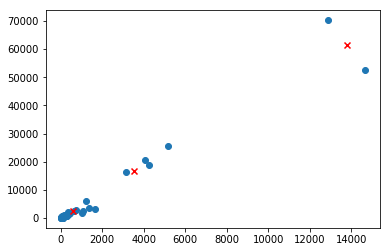

In [41]:
plt.scatter(data['Kapasitas Terpasang (MW)'], data['Tenaga Listrik yang Dibangkitkan (GWh)'])
plt.scatter(KMeansClusterCenter['Kapasitas Terpasang (MW)'], KMeansClusterCenter['Tenaga Listrik yang Dibangkitkan (GWh)'], marker = 'x', c = 'r')
plt.show()

Plot di atas menunjukkan letak dari k-means kluster pada data.